In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
from matplotlib.patches import Patch

### Most Received email adresses

In [2]:
dbConnect = sqlite3.connect('../third_party_analysis.db')
dbCursor = dbConnect.cursor()

query = "SELECT domain, COUNT(*), hashType FROM EmailHashes GROUP BY domain ORDER BY COUNT(*) DESC"
dbCursor.execute(query)
results = dbCursor.fetchall()

for result in results:
    print(result)

dbConnect.close()

('www.facebook.com', 100, 'SHA256')
('ct.pinterest.com', 62, 'SHA256')
('sslwidget.criteo.com', 18, 'SHA256')
('region1.google-analytics.com', 17, 'SHA256')
('ams.creativecdn.com', 16, 'SHA256')
('region1.analytics.google.com', 14, 'SHA256')
('collect.commander1.com', 10, 'SHA256')
('serv-api.target2sell.com', 8, 'SHA256')
('p.cquotient.com', 8, 'SHA256')
('c2.piano.io', 8, 'plain')
('tr.snapchat.com', 7, 'SHA256')
('news.google.com', 7, 'plain')
('depot.personalization.air.prudsys.com', 4, 'SHA256')
('analytics.tiktok.com', 2, 'SHA256')
('02179915.akstat.io', 2, 'SHA256')
('widget.eu.criteo.com', 1, 'SHA256')
('login.user.id', 1, 'base64')
('buy.tinypass.com', 1, 'plain')


**Visualization**

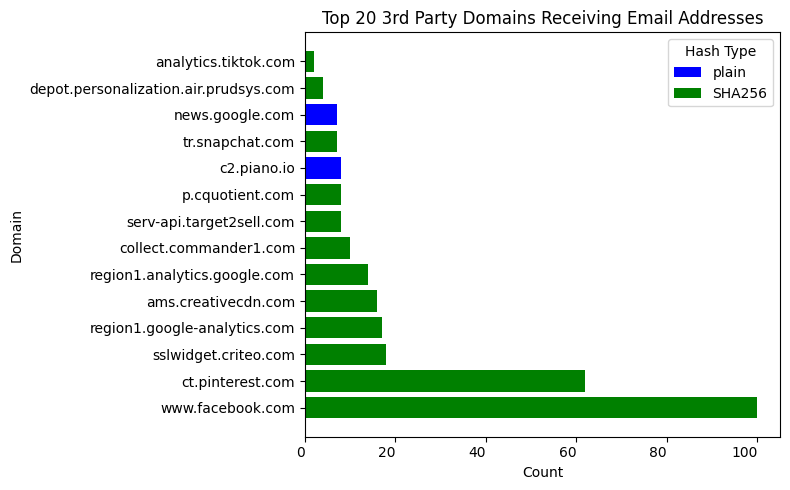

In [3]:
df = pd.DataFrame(results, columns=['Domain', 'Count', 'HashType'])

color_map = {
    'plain': 'blue',
    'SHA256': 'green'
}

# Map colors to hash types
df['Color'] = df['HashType'].map(color_map)

# Select top 20 domains
df_top20 = df.head(14)

# Plotting
plt.figure(figsize=(8, 5))
plt.barh(df_top20['Domain'], df_top20['Count'], color=df_top20['Color'])
plt.title('Top 20 3rd Party Domains Receiving Email Addresses')
plt.xlabel('Count')
plt.ylabel('Domain')
plt.xticks(fontsize='medium', ha='right')
plt.tight_layout()

legend_elements = [Patch(facecolor=color_map[key], label=key) for key in color_map]
plt.legend(handles=legend_elements, title='Hash Type')

plt.show()


### Websites with most shared mail addresses

In [4]:
dbConnect = sqlite3.connect('../third_party_analysis.db')
dbCursor = dbConnect.cursor()

query = "SELECT host, COUNT(*) FROM EmailHashes GROUP BY host ORDER BY COUNT(*) DESC"
dbCursor.execute(query)
results1 = dbCursor.fetchall()

for domain, count in results1:
    print(f"{count}\t{domain}")

dbConnect.close()

198	sephora.de
62	depot-online.de
12	telegraph.co.uk
7	uniqlo.com
4	thehindu.com
2	faz.net
1	merkur.de


**Visualization**

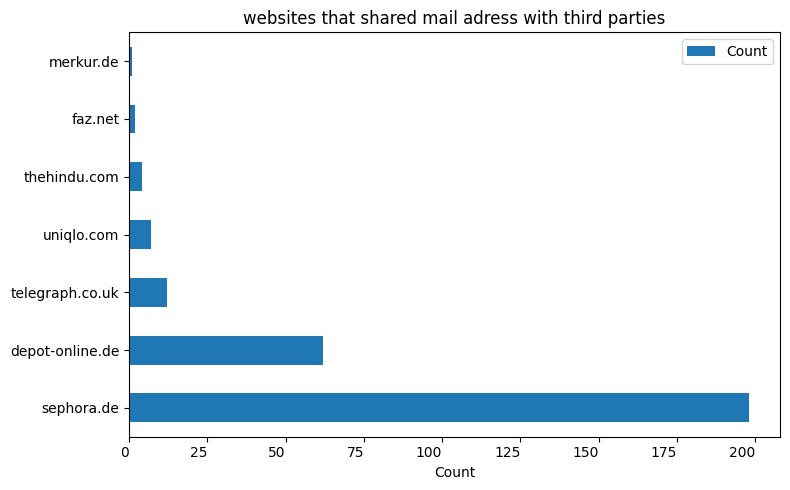

In [5]:
df = pd.DataFrame(results1, columns=['Host', 'Count'])

df_top20 = df.head(15)

df_top20.plot(kind='barh', x='Host', y='Count', figsize=(8, 5))

plt.title('websites that shared mail adress with third parties')
plt.xlabel('Count')
plt.ylabel('')

plt.xticks( fontsize='medium', ha='right')

plt.tight_layout()
plt.show()

### Example: Sephora

In [6]:
dbConnect = sqlite3.connect('../third_party_analysis.db')
dbCursor = dbConnect.cursor()

query = "SELECT domain, COUNT(*) FROM EmailHashes WHERE host = 'sephora.de' GROUP BY domain ORDER BY COUNT(*) DESC"
dbCursor.execute(query)
results2 = dbCursor.fetchall()

for domain, count in results2:
    print(f"{count}\t{domain}")

dbConnect.close()

96	www.facebook.com
30	ct.pinterest.com
17	region1.google-analytics.com
14	region1.analytics.google.com
10	collect.commander1.com
8	sslwidget.criteo.com
8	serv-api.target2sell.com
7	tr.snapchat.com
5	p.cquotient.com
2	02179915.akstat.io
1	widget.eu.criteo.com


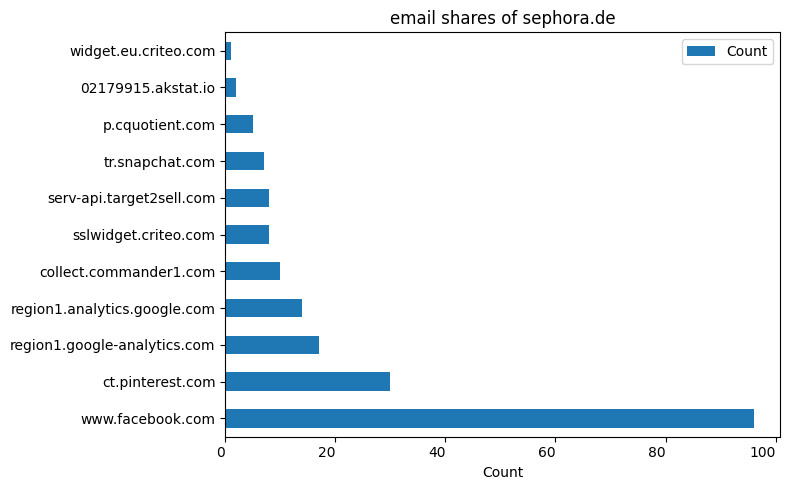

In [7]:
df = pd.DataFrame(results2, columns=['Domain', 'Count'])

df_top20 = df.head(25)

df_top20.plot(kind='barh', x='Domain', y='Count', figsize=(8, 5))

plt.title('email shares of sephora.de')
plt.xlabel('Count')
plt.ylabel('')

plt.xticks( fontsize='medium', ha='right')

plt.tight_layout()
plt.show()